In [ ]:
# General libraries
import os
import numpy as np
import pandas as pd 
import random
import cv2
import matplotlib.pyplot as plt

from keras.models import Model, load_model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


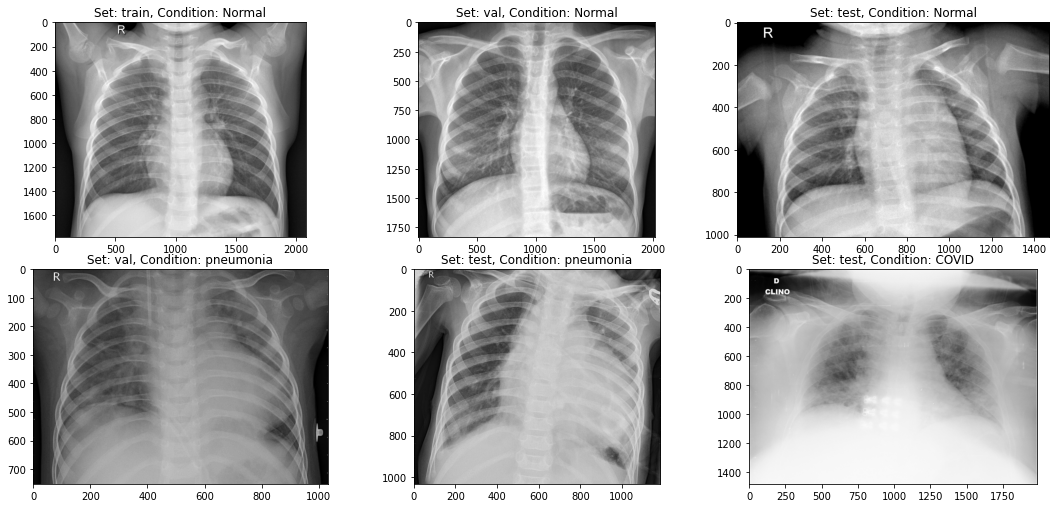

In [ ]:
input_path = '/content/drive/My Drive/COVID-19_Dataset/data/'

fig, ax = plt.subplots(2, 3, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()

for i, _set in enumerate(['train', 'val', 'test']):
    set_path = input_path+_set
    ax[i].imshow(plt.imread(set_path+'/NORMAL/'+os.listdir(set_path+'/NORMAL')[0]), cmap='gray')
    ax[i].set_title('Set: {}, Condition: Normal'.format(_set))

    ax[i+2].imshow(plt.imread(set_path+'/PNEUMONIA/'+os.listdir(set_path+'/PNEUMONIA')[0]), cmap='gray')
    ax[i+2].set_title('Set: {}, Condition: pneumonia'.format(_set))

    ax[i+3].imshow(plt.imread(set_path+'/COVID/'+os.listdir(set_path+'/COVID')[0]), cmap='gray')
    ax[i+3].set_title('Set: {}, Condition: COVID'.format(_set))

In [ ]:
# Distribution of our datasets
for _set in ['train', 'val', 'test']:
    n_normal = len(os.listdir(input_path + _set + '/NORMAL'))
    n_pneumonia = len(os.listdir(input_path + _set + '/PNEUMONIA'))
    n_covid = len(os.listdir(input_path + _set +'/COVID'))
    print('Set: {}, normal images: {}, pneumonia images: {},covid images: {}'.format(_set, n_normal, n_pneumonia,n_covid))

Set: train, normal images: 1259, pneumonia images: 4261,covid images: 304
Set: val, normal images: 232, pneumonia images: 390,covid images: 304
Set: test, normal images: 1259, pneumonia images: 390,covid images: 304


In [ ]:
input_path = '/content/drive/My Drive/COVID-19_Dataset/data/'
img_dims=150
train_data=[]
train_labels=[]
for cond in ['/NORMAL/','/PNEUMONIA/','/COVID/']:
    for img in (os.listdir(input_path + 'train' + cond)):
        if cond=='/NORMAL/':
            label = 0
        elif cond=='/PNEUMONIA/':
            label = 1
        elif cond=='/COVID/':
            label = 2
        img = cv2.imread(input_path+'train'+cond+img)
        #img = cv2.resize(img, (img_dims, img_dims))
        try:
           img = cv2.resize(img, (img_dims,img_dims), interpolation=cv2.INTER_AREA)
            #print(img.shape)
        except:
         break
        img = img.astype('float32') / 255
        
        train_data.append(np.array(img))      
        train_labels.append(np.array(label))

In [ ]:
test_data = []
test_labels = []

for cond in ['/NORMAL/', '/PNEUMONIA/','/COVID/']:
    for img in (os.listdir(input_path + 'test' + cond)):
      if cond=='/NORMAL/':
          label = 0
      elif cond=='/PNEUMONIA/':
          label = 1
      elif cond=='/COVID/':
          label = 2
      img = cv2.imread(input_path+'test'+cond+img)
     # img = cv2.resize(img, (img_dims, img_dims))
      try:
           img = cv2.resize(img, (img_dims,img_dims), interpolation=cv2.INTER_AREA)
            #print(img.shape)
      except:
        break
        #img = np.dstack([img, img, img])
      img = img.astype('float32') / 255
        
      test_data.append(np.array(img))
      test_labels.append(np.array(label))
        
test_data = (np.array(test_data))
test_labels = (np.array(test_labels))
a=np.array(test_data)
a.shape

(1953, 150, 150, 3)

In [ ]:
a=np.array(test_data)
a1=np.array(test_labels)
b=np.array(train_data)
b1=np.array(train_labels)
print(b.shape)
print(a.shape)
print(a1.shape)
print(b1.shape)


(5824, 150, 150, 3)
(1953, 150, 150, 3)
(1953,)
(5824,)


In [ ]:
c=np.concatenate((a, b))
c_l=np.hstack((a1,b1))
c.shape

(7777, 150, 150, 3)

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

In [ ]:
model = VGG16(weights='imagenet', include_top=False)
VGG16FeatureList = []

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
VGG16FeatureList = []
X = c
Y=np.array(c_l)
for i in range(X.shape[0]):
  I=X[i,:,:,:]
  I=np.expand_dims(I, axis=0)
  VGG16Feature = model.predict(I)
  VGG16FeatureNp = np.array(VGG16Feature)
  VGG16FeatureList.append(VGG16FeatureNp.flatten())

In [ ]:
XX = np.array(VGG16FeatureList)
print(XX.shape)
print(Y.shape)  


(7777, 8192)
(7777,)


In [ ]:
# SVM Classifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
x_train,x_test,y_train,y_test=train_test_split(XX,Y,random_state=0)#changed from 42 to 0
# the model
classifier_svc=SVC(kernel='linear', C=0.01,random_state=0)#changing the value of c, the accuracy improved.
# fit the model using the training set
classifier_svc.fit(x_train,y_train)
#Accuracy score
accuracy=classifier_svc.score(x_test,y_test)
print(accuracy)


0.9881748071979435


[[ 621    5    0]
 [  17 1148    0]
 [   0    1  153]]

TEST METRICS ----------------------
Accuracy: 0.9881748071979435%
Precision: [50. 50. nan 50. 50. nan nan 50. 50.]%
Recall: [50. 50. nan 50. 50. nan nan 50. 50.]%
F1-score: [50. 50. nan 50. 50. nan nan 50. 50.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


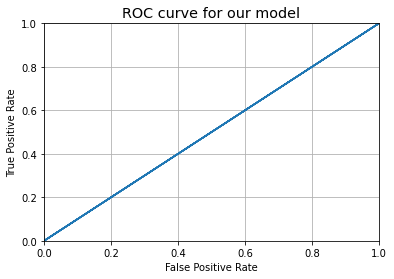

In [ ]:
from pyparsing.core import trace_parse_action
from traitlets.traitlets import Any
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# predict the labels/classes of the test set
y_pred = classifier_svc.predict(x_test)
# build the confusion matrix
print("==============================================================")
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("===============================================================")
#from sklearn.metrics import  accuracy_score,precision_score,recall_score,f1_score
##########################################################_HERE
tn = cnf_matrix.ravel()
fp=cnf_matrix.ravel()
fn=cnf_matrix.ravel()
tp=cnf_matrix.ravel()
print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(accuracy))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))
thresholds=np.true_divide(y_test, y_pred)
tpr=np.true_divide(y_test, y_pred)
fpr=np.true_divide(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for our model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)


Confusion matrix, without normalization
[[0.99 0.01 0.  ]
 [0.01 0.99 0.  ]
 [0.   0.01 0.99]]
Normalized confusion matrix
[[0.99 0.01 0.  ]
 [0.01 0.99 0.  ]
 [0.   0.01 0.99]]


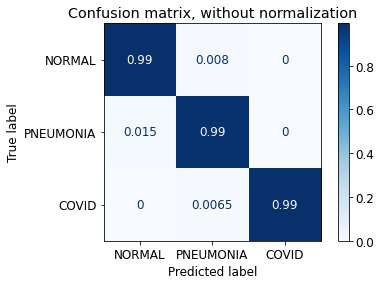

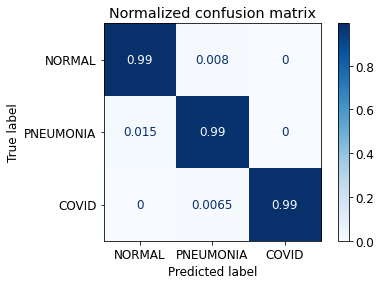

In [ ]:
#plot Confusion Matrix
classes = ['NORMAL','PNEUMONIA','COVID']

np.set_printoptions(precision=2)

titles_options = [
    ("Confusion matrix, without normalization" , "true"),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier_svc,
        x_test,
        y_test,
        display_labels=classes,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    
    print(title)
    
    print(disp.confusion_matrix)
    
plt.show()